# Part 2

#  Import Library & Upload Visualization/Analysis

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import pickle file
path = "/Users/drich/Desktop/06-09-2023 Instacart Basket Analysis"
ords_prods_merge = pd.read_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'ords_prods_customer_merge_.pkl'))

### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates

Text(0, 0.5, 'Frequency')

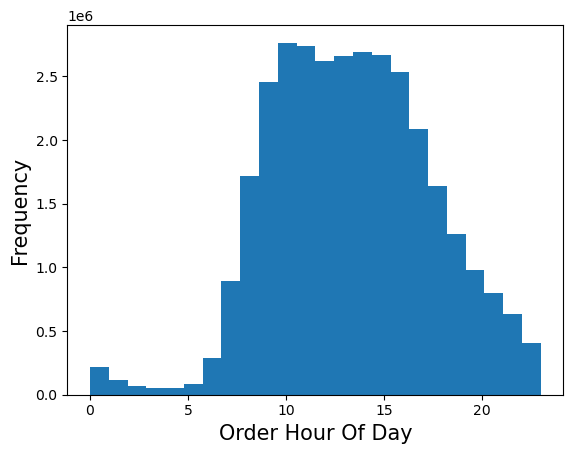

In [3]:
# Creating histogram
hist = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24) #24hours 
plt.xlabel("Order Hour Of Day", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

This histogram is demonstrating that the influx slowly begins around 7:00 AM. Peak comes at approximately 10:00 AM, remaining busy until around 4:00 PM, insinuating the most frequent order would be sustained around lunch/ afternoon.

In [4]:
# Export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

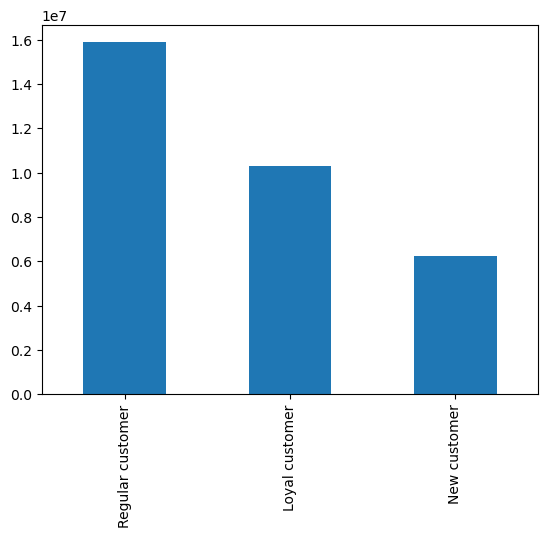

In [5]:
# 4 bar chart for loyalty flag customers
bar_loyalty_flag = ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

Bulk of customers are "regular" customers

In [6]:
# Exporting Visualization 
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [7]:
# Create sample data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [8]:
# Store 70% of sample in dataframe big
big = ords_prods_merge[dev]

In [9]:
# Store 30% of sample in dataframe small
small = ords_prods_merge[~dev] 

In [10]:
# Count number number of rows
len(big)+ len(small)

32434212

In [11]:
len(ords_prods_merge)

32434212

The numbers match :)

In [12]:
# Make subset w/ only 'prices' & 'order hour of day' columns
df = small[['prices', 'order_hour_of_day']]

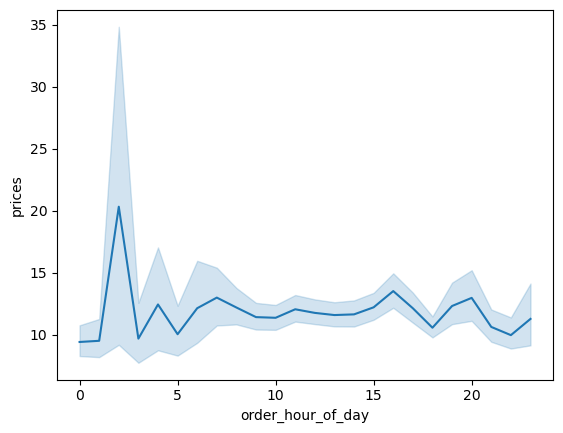

In [13]:
# Make line graph
line_price_hour = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

In [14]:
# Export viz
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour.png'))

No major correlation has been detected in the relationship between order hour of day and prices.

### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows. Done.

Text(0.5, 1.0, 'Number of Users by Marital Status')

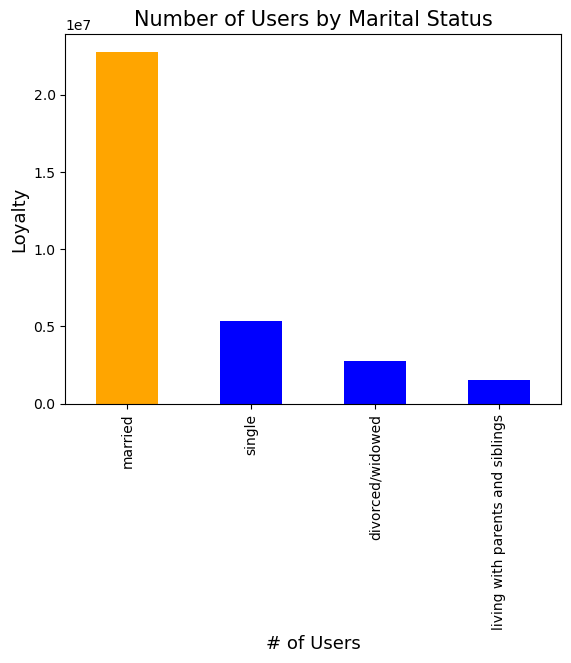

In [15]:
# Create bar chart to find distribution of marital status from 'fam_status'
marital_status = ords_prods_merge['fam_status'].value_counts().plot.bar(color = ['orange', 'blue', 'blue', 'blue'])
plt.xlabel("# of Users", fontsize=13)
plt.ylabel("Loyalty", fontsize=13)  
plt.title("Number of Users by Marital Status", fontsize=15)

In [16]:
# Export viz
marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_status.png'))

Most instacart users appear to be married (most noteable from visual)

In [17]:
#create a subset of 'n_dependants' and 'age'
df_2 = small[['n_dependants', 'age']]

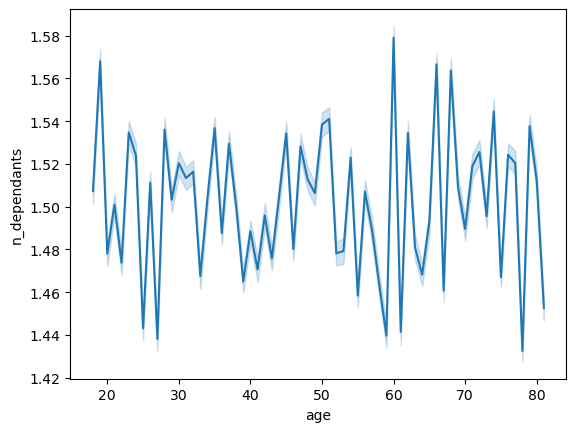

In [18]:
line_dependants_age = sns.lineplot(data = df_2, x = 'age',y = 'n_dependants')

No major correlation has been detected in the relationship between age and number of dependants.

In [19]:
# Export viz
line_dependants_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependants_age.png'))

### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

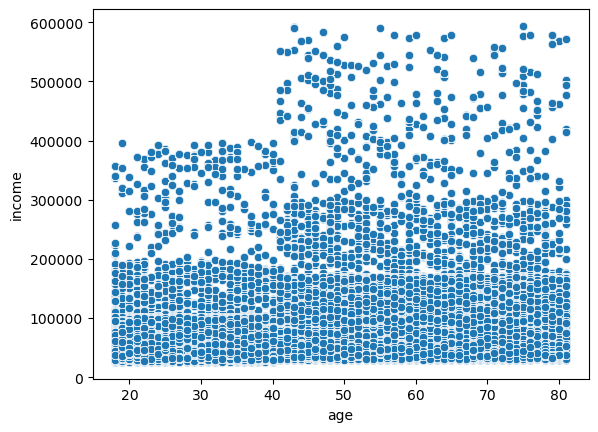

In [20]:
#Creating scatterplot
age_income_scatter_plot = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_merge)

Income surpassing 400,000 from 40 years old

In [21]:
# Export the visualization 
age_income_scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_scatter_plot.png'))

In [22]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 33 columns):
 #   Column                         Dtype   
---  ------                         -----   
 0   order_id                       int64   
 1   user_id                        int64   
 2   order_number                   int64   
 3   orders_day_of_week             int64   
 4   order_hour_of_day              int64   
 5   days_following_previous_order  float64 
 6   product_id                     int64   
 7   add_to_cart_order              int64   
 8   reordered                      int64   
 9   Unnamed: 0_y                   int64   
 10  product_name                   object  
 11  aisle_id                       int64   
 12  department_id                  int64   
 13  prices                         float64 
 14  _merge                         category
 15  busiest_day                    object  
 16  busiest_days                   object  
 17  busiest_period_of_day    